### References

Formulae based on this paper: https://ssd.jpl.nasa.gov/txt/aprx_pos_planets.pdf

Solar system simulator to compare my calculations: https://theskylive.com/3dsolarsystem

Small body database: https://ssd.jpl.nasa.gov/?sb_elem and https://ssd.jpl.nasa.gov/sbdb_query.cgi#x

Orbital elements summary: https://en.wikipedia.org/wiki/Orbital_elements

Some clues for Pluto's position problem (was working on that at last):
- http://cosinekitty.com/solar_system.html
- http://www.stjarnhimlen.se/comp/ppcomp.html#2
- https://web.archive.org/web/20050308023646/http://www.xylem.f2s.com/kepler/kepler.html
- http://cdsarc.u-strasbg.fr/viz-bin/qcat?VI/

In [6]:
%pylab qt
%matplotlib inline

import pandas
import astropy.constants as const
import datetime

from CelestialBody import CelestialBody

mercury = CelestialBody("Mercury")
venus   = CelestialBody("Venus")
earth   = CelestialBody("EM Bary")
mars    = CelestialBody("Mars")
jupiter = CelestialBody("Jupiter")
saturn  = CelestialBody("Saturn")
uranus  = CelestialBody("Uranus")
neptune = CelestialBody("Neptune")
pluto   = CelestialBody("Pluto")

planets = [mercury, venus, earth, mars, jupiter, saturn, uranus, neptune, pluto]

Populating the interactive namespace from numpy and matplotlib


In [14]:
pluto.position

(-26.14681367229985, -11.81550004161315, 8.827733163057546)

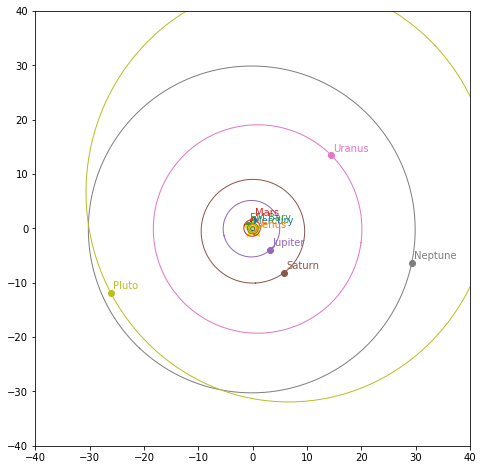

In [8]:
plt.figure(figsize=(12,8))
sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))
ax.set_aspect("equal")
a_lim = 40
ax.set_xlim(-a_lim,a_lim)
ax.set_ylim(-a_lim,a_lim)
ax.plot([0],[0], "*", color="gold", markersize=20)

date = datetime.datetime(2021,2,12)
for i, planet in enumerate(planets):
    planet.date = date
    x,y,z = planet.position
    plt.scatter(x,y, marker="o", color="C"+str(i))
    X,Y,Z = planet.orbit
    plt.plot(X,Y, color="C0"+str(i), linewidth=1)
    if planet.a < a_lim:
        plt.annotate(planet.name, (x,y), color="C0"+str(i), textcoords="offset points", xytext=(2,2),
                     fontsize="medium", horizontalalignment='left', verticalalignment='bottom', alpha=1)